<a href="https://colab.research.google.com/github/stixmal/praktikum_project_ds/blob/main/%D0%9E%D1%82%D1%82%D0%BE%D0%BA%20%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2%20%D0%B8%D0%B7%20%D0%B1%D0%B0%D0%BD%D0%BA%D0%B0/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Оглавление

### [1. Подготовка данных](#1) <a id='10'></a>   

### [2. Исследование задачи](#2) <a id='20'></a>

+ [2.1 Решающее дерево](#2.1) 


+ [2.2 Случайный лес](#2.2) 


+ [2.3 Логистическая регрессия](#2.3) 

### [3. Борьба с дисбалансом](#3) <a id='30'></a>

+ [3.1 Решающее дерево](#3.1) 


+ [3.2 Случайный лес](#3.2) 


+ [3.3 Логистическая регрессия](#3.3)


### [4. Тестирование модели](#4) <a id='40'></a>


***


## 1. Подготовка данных <a id='1'></a>   [^](#10) 

In [ ]:
# импорт библиотеки pandas
import pandas as pd  

# импорт модуля display
from IPython.display import display  

# импорт mathplotlib
import matplotlib.pyplot as plt

In [ ]:
# чтение файла с данными и визуальная оценка таблицы
df = pd.read_csv('/datasets/Churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Признаки:  

* **RowNumber** — индекс строки в данных
* **CustomerId** — уникальный идентификатор клиента
* **Surname** — фамилия
* **CreditScore** — кредитный рейтинг
* **Geography** — страна проживания
* **Gender** — пол
* **Age** — возраст
* **Tenure** — количество недвижимости у клиента
* **Balance** — баланс на счёте
* **NumOfProducts** — количество продуктов банка, используемых клиентом
* **HasCrCard** — наличие кредитной карты
* **IsActiveMember** — активность клиента
* **EstimatedSalary** — предполагаемая зарплата

Целевой признак:

* **Exited** — факт ухода клиента

Удалили дублирующий индексы столбец, а также сильно коррелирующий с пользовательским id столбец с фамилиями.

In [ ]:
# удаление столбца с индексом строки, id и столбца с фамилией
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1)

# замена пропущенных значений в столбце с количеством недвижимости медианой
df['Tenure'] = df['Tenure'].fillna(value = df['Tenure'].median())

In [ ]:
# вызов функции из sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# провели прямое кодирование категориальных признаков с избеганием дамми-ловушки 
data_ohe = pd.get_dummies(df, drop_first=True)

# переменные с признаками и ответами
features = data_ohe.drop(['Exited'], axis=1)
target = data_ohe['Exited']

In [ ]:
# раздел на 60 % обучающей и 40 % совмещённой выборки
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.4, random_state=12345)

# раздел на валидационную и тестовую выборку в соотношении 1:1
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_test, target_valid_test, test_size=0.5, random_state=12345)

Проконтролировали размер выборок.

In [ ]:
features_train.shape[0]

6000

In [ ]:
features_valid.shape[0]

2000

In [ ]:
features_test.shape[0]

2000

In [ ]:
df.shape[0]

10000

In [ ]:
# провели масштабирование числовых признаков
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [ ]:
import warnings
warnings.filterwarnings('ignore') 

# cоздали объект структуры StandardScaler() и настроили его на обучающих данных
scaler = StandardScaler()
scaler.fit(features_train[numeric])

# преобразовали обучающую, валидационную и тестовую выборки функцией transform()
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

### Вывод  

Провели кодирование категориальных признаков и масштабирование численных. Данные готовы к дальнейшему анализу.

***

## 2. Исследование задачи <a id='2'></a>   [^](#10) 

Исследовали баланс классов и обнаружили дисбаланс.

In [ ]:
# частоты классов целевого признака
df['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Посмотрели как обучаются и предсказывают разные модели при дисбалансе классов.

* ### 2.1 Решающее дерево <a id='2.1'></a> [^](#10)

In [ ]:
# импорт модели дерева решений из библиотеки sklearn
from sklearn.tree import DecisionTreeClassifier

# импорт f1 меры
from sklearn.metrics import f1_score

# импорт метрики roc-auc
from sklearn.metrics import roc_auc_score

# проход по гиперпараметрам в цикле и нахождение наилучшей модели дерева решений
best_result = 0
best_depth = 0
best_samples_leaf = 0

# меняя глубину дерева с 1 до 5, будем также менять минимальное число объектов в листьях деревьев с 1 до 5
for depth in range(1, 6):
    for samples_leaf in range(1, 6):
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=samples_leaf)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        
        # предсказание вероятности положительного класса для метрики auc-roc
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        
        if result > best_result:
            best_result = result
            best_depth = depth
            best_samples_leaf = samples_leaf
            best_auc_roc = auc_roc
              
print("f1_score: {:.3f} | auc-roc: {:.3f} | Глубина дерева: {} | Минимальное число объектов в листьях: {}"
      .format(best_result, best_auc_roc, best_depth, best_samples_leaf))   

f1_score: 0.554 | auc-roc: 0.815 | Глубина дерева: 4 | Минимальное число объектов в листьях: 3


* ### 2.2 Случайный лес<a id='2.2'></a> [^](#10)

In [ ]:
# импорт модели случайного леса из библиотеки sklearn
from sklearn.ensemble import RandomForestClassifier

# проход по гиперпараметрам в цикле и нахождение наилучшей модели случайного леса
best_result = 0
best_depth = 0
best_est = 0

# изменим количество деревьев в лесу с 10 до 50 с шагом 10 и глубину каждого дерева с 1 до 10
for est in range(10, 51, 10):
    for depth in range(1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)  
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        
        # предсказание вероятности положительного класса для метрики auc-roc
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        
        if result > best_result:
            best_result = result
            best_depth = depth
            best_est = est
            best_auc_roc = auc_roc
            
print("f1_score: {:.3f} | auc-roc: {:.3f} | Глубина дерева: {} | Количество деревьев: {}"
      .format(best_result, best_auc_roc, best_depth, best_est))      

f1_score: 0.589 | auc-roc: 0.846 | Глубина дерева: 10 | Количество деревьев: 10


* ### 2.3 Логистическая регрессия <a id='2.3'></a> [^](#10)

In [ ]:
# импорт логистической регрессии
from sklearn.linear_model import LogisticRegression

# создание модели логистической регрессии
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
result = f1_score(target_valid, predictions_valid)

# предсказание вероятности положительного класса для метрики auc-roc
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print("f1_score:{:.3f} | auc-roc:{:.3f}".format(result, auc_roc))   

f1_score:0.331 | auc-roc:0.759


### Вывод  

При неучитывании дисбаланса классов лучшие результаты показывает случайный лес: f1 мера почти дотягивает до условно успешного значения в 0,59 при количестве деревьев 10.

***

## 3. Борьба с дисбалансом <a id='3'></a>   [^](#10) 

In [ ]:
# импорт функции перемешивания
from sklearn.utils import shuffle

# написали функцию для "апсеплинга" положительного класса для уменьшения дисбаланса в выборках
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [ ]:
# upsampling тренировочной выборки
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

# частоты классов целевого признака после апсемплинга
target_upsampled.value_counts(normalize=True)

0    0.501043
1    0.498957
Name: Exited, dtype: float64

* ### 3.1 Решающее дерево <a id='3.1'></a> [^](#10)

In [ ]:
best_model = None
best_result = 0
best_depth = 0
best_samples_leaf = 0

# меняя глубину дерева с 1 до 5, будем также менять минимальное число объектов в листьях деревьев с 1 до 5
# применили также аргумент "вес класса"
for depth in range(1, 6):
    for samples_leaf in range(1, 6):
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=samples_leaf,
                                       class_weight='balanced')
        model.fit(features_upsampled, target_upsampled)
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        
        # предсказание вероятности положительного класса для метрики auc-roc
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        
        if result > best_result:
            best_model_tree = model
            best_result = result
            best_depth = depth
            best_samples_leaf = samples_leaf
            best_auc_roc = auc_roc
              
print("f1_score: {:.3f} | auc-roc: {:.3f} | Глубина дерева: {} | Минимальное число объектов в листьях: {}"
      .format(best_result, best_auc_roc, best_depth, best_samples_leaf)) 

f1_score: 0.599 | auc-roc: 0.835 | Глубина дерева: 5 | Минимальное число объектов в листьях: 2


* ### 3.2 Случайный лес<a id='3.2'></a> [^](#10)

In [ ]:
best_model = None
best_result = 0
best_depth = 0
best_est = 0

# изменим количество деревьев в лесу с 10 до 50 с шагом 10 и глубину каждого дерева с 1 до 10
# применили также аргумент "вес класса"
for est in range(10, 51, 10):
    for depth in range(1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model.fit(features_upsampled, target_upsampled)  
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        
        # предсказание вероятности положительного класса для метрики auc-roc
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        
        if result > best_result:
            best_model_forest = model
            best_result = result
            best_depth = depth
            best_est = est
            best_auc_roc = auc_roc
            
print("f1_score: {:.3f} | auc-roc: {:.3f} | Глубина дерева: {} | Количество деревьев: {}"
      .format(best_result, best_auc_roc, best_depth, best_est))   

f1_score: 0.626 | auc-roc: 0.854 | Глубина дерева: 10 | Количество деревьев: 40


* ### 3.3 Логистическая регрессия <a id='3.3'></a> [^](#10)

In [ ]:
# создание модели логистической регрессии
model = LogisticRegression(random_state=12345, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
predictions_valid = model.predict(features_valid)
result = f1_score(target_valid, predictions_valid)

# предсказание вероятности положительного класса для метрики auc-roc
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print("f1_score:{:.3f} | auc-roc:{:.3f}".format(result, auc_roc))   

f1_score:0.489 | auc-roc:0.764


### Вывод  

Для уменьшения дисбаланса классов применили семплирование выборок: частоту положительного класса практически сравняли с частотой отрицательного. Данный приём заметно поднял F1-меру, а также численное значение auc-roc. Лучшая модель рандомного леса показала f1 меру примерно 0,626. Возьмём её для оценки тестирования качества лучшей модели.

***

## 4. Тестирование модели <a id='4'></a>   [^](#10) 

Выполнили тестирование лучшей модели, показавшей лучший f1 score, на тестовой выборке. Лучшая модель определилась из случайного леса.

In [ ]:
predictions_test = best_model_forest.predict(features_test)
best_result = f1_score(target_test, predictions_test)

# вероятности положительного класса для метрики auc-roc
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)

print("f1_score:{:.3f} | auc-roc:{:.3f}".format(best_result, auc_roc))  

f1_score:0.612 | auc-roc:0.742


Построили график ROC-кривой.

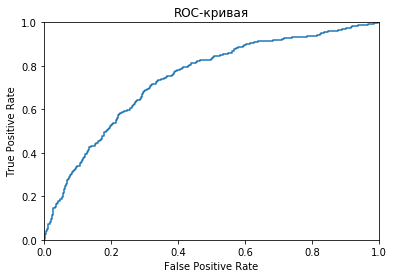

In [ ]:
# импорт roc-кривой
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)


plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

### Вывод  

На тестовой выборке лучшая модель случайного леса показала необходимую метрику f1 score выше минимально допустимой, равной 0,59. Численно roc-кривая превосходит значение в 0,5 и визуально отстоит от прямой диагонали, что указывает на относительно более высокую прогностическую точность модели по сравнению с рандомом.